In [264]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
train_raw = pd.read_csv('../data/raw//train.csv') #学習データ
test_raw = pd.read_csv('../data/raw/test.csv') #テストデータ
print('The size of the train data:' + str(train_raw.shape))
print('The size of the test data:' + str(test_raw.shape))

The size of the train data:(891, 12)
The size of the test data:(418, 11)


In [266]:
train_mid = train_raw.copy()
test_mid = test_raw.copy()
train_mid['train_or_test'] = 'Train' #学習データフラグ
test_mid['train_or_test'] = 'Test' #テストデータフラグ
test_mid['Survived'] = 9 #テストにSurvivedカラムを仮置き

alldata = pd.concat(
    [
        train_mid,
        test_mid
    ],
    sort=False,
    axis=0
).reset_index(drop=True)

In [267]:
print(alldata.shape)
alldata.head()

(1309, 13)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_or_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train


In [268]:
# Ticketの分析
# 同一チケット
for i, v in alldata.groupby(['Ticket']):
    if len(v) > 5:
        break

In [269]:
v

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_or_test
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,Train
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,Train
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S,Train
708,709,1,1,"Cleaver, Miss. Alice",female,22.00,0,0,113781,151.55,NaN,S,Train
1032,1033,9,1,"Daniels, Miss. Sarah",female,33.00,0,0,113781,151.55,NaN,S,Test
1197,1198,9,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C22 C26,S,Test


In [270]:
v

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_or_test
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,Train
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,Train
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S,Train
708,709,1,1,"Cleaver, Miss. Alice",female,22.00,0,0,113781,151.55,NaN,S,Train
1032,1033,9,1,"Daniels, Miss. Sarah",female,33.00,0,0,113781,151.55,NaN,S,Test
1197,1198,9,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C22 C26,S,Test


In [271]:
# Ticket頻度
alldata.loc[:, 'TicketFreq'] = alldata.groupby(['Ticket'])['PassengerId'].transform('count')

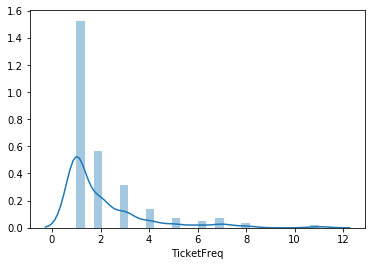

In [272]:
import seaborn as sns
sns.distplot(alldata.TicketFreq)

In [273]:
# テストデータの敬称(honorific)を抽出
alldata['honorific'] = alldata['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])

In [274]:
# Ageを補完
# for i,v in alldata.groupby(['honorific']):
#     if v.Age.isnull().sum() > 0:
#         alldata.loc[(alldata.honorific==i) & alldata.Age.isnull(), 'Age'] = v.Age.mean()

In [275]:
# Embarkedには最頻値を代入
alldata.Embarked.fillna(alldata.Embarked.mode()[0], inplace=True)
# Fareには中央値を代入
alldata.Fare.fillna(alldata.Fare.median(), inplace=True)

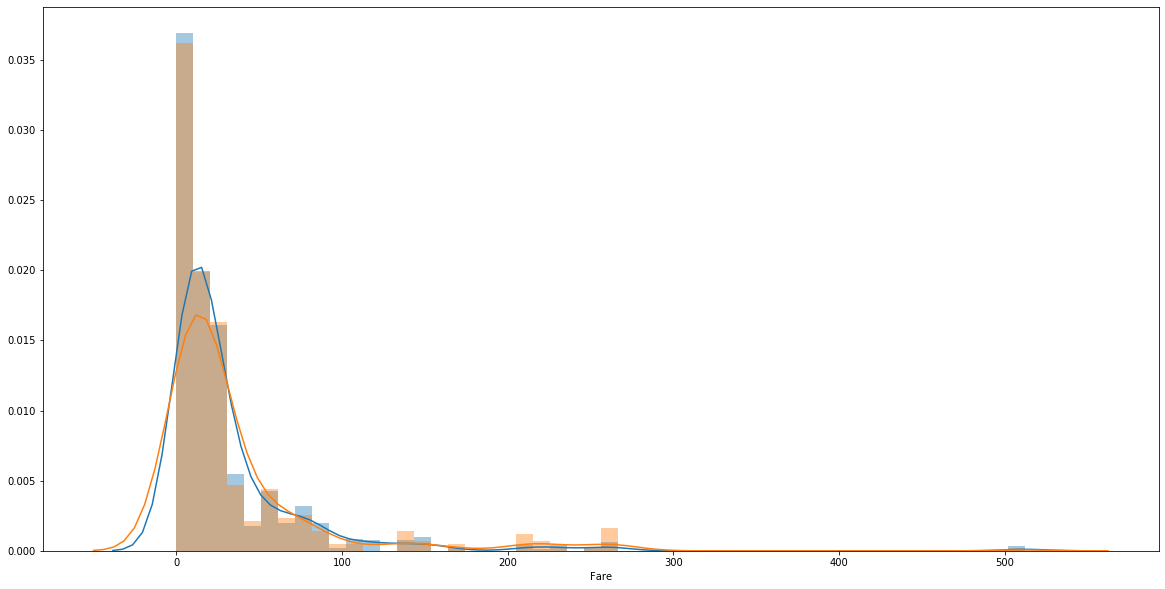

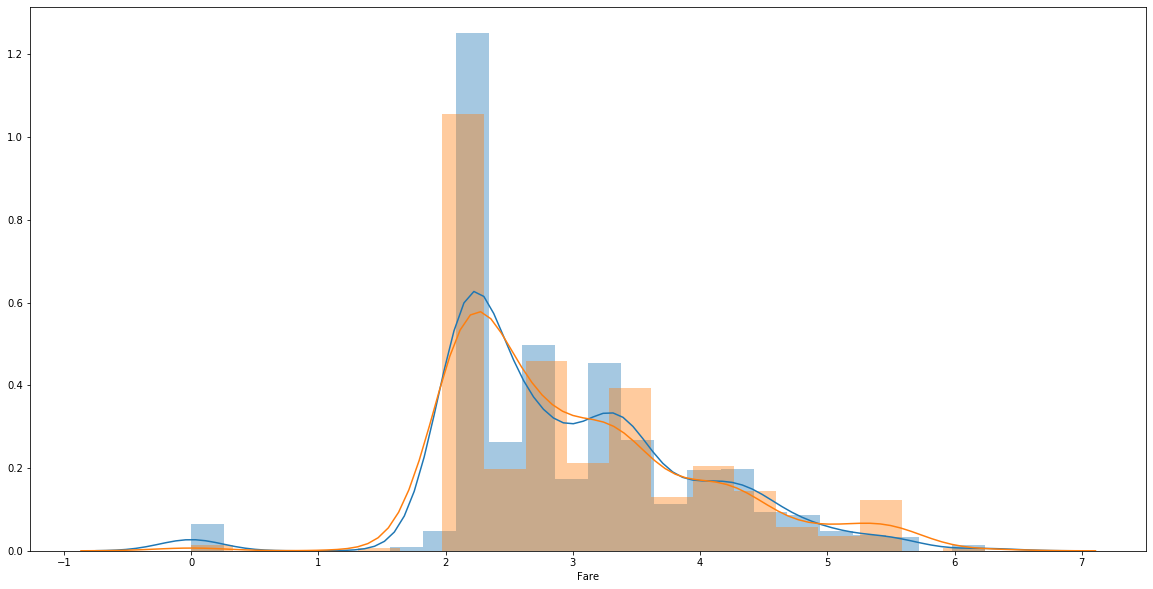

In [276]:
# Fareを対数変換した後のプロット
plt.figure(figsize=(20,10))
sns.distplot(alldata.query('train_or_test == "Train"').Fare)
sns.distplot(alldata.query('train_or_test == "Test"').Fare)
plt.figure(figsize=(20,10))
sns.distplot(np.log1p(alldata.query('train_or_test == "Train"').Fare))
sns.distplot(np.log1p(alldata.query('train_or_test == "Test"').Fare))

In [277]:
alldata.loc[:, 'Fare_log'] = np.log1p(alldata.Fare)

# print(alldata.query('Fare_log < 2 & train_or_test == "Train"').Survived.sum()/len(alldata.query('Fare_log < 2 & train_or_test == "Train"')))
# print(alldata.query('Fare_log > 4 & train_or_test == "Train"').Survived.sum()/len(alldata.query('Fare_log > 4 & train_or_test == "Train"')))
# print(alldata.query('4 >= Fare_log >= 2 & train_or_test == "Train"').Survived.sum()/len(alldata.query('4 >= Fare_log >= 2 & train_or_test == "Train"')))

In [278]:
# Fareの分割
# alldata['Fare_bin'] = 'low'
# alldata.loc[alldata['Fare_log']>4, 'Fare_bin'] = 'high'
# alldata.loc[(alldata['Fare']>=2) & (alldata['Fare']<=4), 'Fare_bin'] = 'middle'
alldata.loc[:, 'Fare_bin'] = pd.qcut(alldata.Fare, 14)
# 敬称(honorific)の加工
alldata['honorific'].replace(['Col','Dr', 'Rev'], 'Rare',inplace=True) #少数派の敬称を統合
alldata['honorific'].replace('Mlle', 'Miss',inplace=True) #Missに統合
alldata['honorific'].replace('Ms', 'Miss',inplace=True) #Missに統合
# Familysize
alldata['FamilySize'] = alldata['Parch'] + alldata['SibSp'] + 1 #ALLデータ
# isAlne
# alldata.loc[:, 'isAlne'] = 1
# alldata.loc[alldata['FamilySize']>1, 'isAlne'] = 0
# FamilySizeを離散化
alldata['FamilySize_bin'] = 'big'
alldata.loc[alldata['FamilySize']==1,'FamilySize_bin'] = 'alone'
alldata.loc[(alldata['FamilySize']>=2) & (alldata['FamilySize']<=4),'FamilySize_bin'] = 'small'
alldata.loc[(alldata['FamilySize']>=5) & (alldata['FamilySize']<=7),'FamilySize_bin'] = 'mediam'
# Cabinの頭文字
alldata['Cabin_ini'] = alldata['Cabin'].map(lambda x:str(x)[0])
alldata['Cabin_ini'].replace(['G','T'], 'Rare',inplace=True) #少数派のCabin_iniを統合

In [279]:
id_col = 'PassengerId'
target_col = 'Survived'
# feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Fare_bin', 'Embarked','honorific', 'FamilySize', 'FamilySize_bin', 'Cabin_ini']
# feature_cols = ['Pclass', 'Sex', 'SibSp', 'Fare_bin', 'Embarked','honorific', 'FamilySize_bin', 'Cabin_ini']
drop_col = ['PassengerId','Survived', 'Name', 'Fare', 'Ticket', 'Cabin', 'train_or_test', 'Age', 'Parch', 'FamilySize', 'SibSp', 'Fare_log']

In [280]:
# Pclassをオブジェクト型に変換
alldata.Pclass = alldata.Pclass.astype('str')

In [281]:
# カテゴリカル変数
# cat_col = ['Pclass','Sex','Embarked','honorific','Fare_bin','FamilySize_bin','Cabin_ini']
cat_col = ['Pclass','Sex','Embarked','honorific','Cabin_ini', 'FamilySize_bin', 'Fare_bin']

In [282]:
# カテゴリ特徴量についてラベルエンコーディング
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
    alldata.loc[:, col] = le.fit_transform(alldata[col])

In [283]:
# 欠損値補完
alldata.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                263
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1014
Embarked             0
train_or_test        0
TicketFreq           0
honorific            0
Fare_log             0
Fare_bin             0
FamilySize           0
FamilySize_bin       0
Cabin_ini            0
dtype: int64

In [284]:
alldata = pd.get_dummies(alldata, drop_first=True, columns=cat_col)

In [285]:
alldata.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'train_or_test', 'TicketFreq', 'Fare_log',
       'FamilySize', 'Pclass_1', 'Pclass_2', 'Sex_1', 'Embarked_1',
       'Embarked_2', 'honorific_1', 'honorific_2', 'honorific_3',
       'honorific_4', 'honorific_5', 'honorific_6', 'honorific_7',
       'honorific_8', 'honorific_9', 'honorific_10', 'honorific_11',
       'honorific_12', 'honorific_13', 'Cabin_ini_1', 'Cabin_ini_2',
       'Cabin_ini_3', 'Cabin_ini_4', 'Cabin_ini_5', 'Cabin_ini_6',
       'Cabin_ini_7', 'FamilySize_bin_1', 'FamilySize_bin_2',
       'FamilySize_bin_3', 'Fare_bin_1', 'Fare_bin_2', 'Fare_bin_3',
       'Fare_bin_4', 'Fare_bin_5', 'Fare_bin_6', 'Fare_bin_7', 'Fare_bin_8',
       'Fare_bin_9', 'Fare_bin_10', 'Fare_bin_11', 'Fare_bin_12',
       'Fare_bin_13'],
      dtype='object')

In [286]:
train = alldata.query('train_or_test == "Train"')
test = alldata.query('train_or_test == "Test"')

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
train_feature = train.drop(columns=drop_col)
test_feature = test.drop(columns=drop_col)
train_tagert = train[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    train_feature, train_tagert, test_size=0.2, random_state=0, stratify=train_tagert)

In [289]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## ベースライン

In [290]:
survive_rate = y_train.sum()/len(y_train)
print(f'survive rate:{survive_rate}')

survive rate:0.38342696629213485


In [291]:
print(f'base line accuracy: {1 - survive_rate}')

base line accuracy: 0.6165730337078652


In [292]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
print('RandomForestClassifier')
print('='*20)
print(f'accuracy of train set: {rfc.score(X_train, y_train)}')
print(f'accuracy of test set: {rfc.score(X_test, y_test)}')

RandomForestClassifier
accuracy of train set: 0.9199438202247191
accuracy of test set: 0.776536312849162


In [293]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)
print('XGBClassifier')
print('='*20)
print(f'accuracy of train set: {xgb.score(X_train, y_train)}')
print(f'accuracy of train set: {xgb.score(X_test, y_test)}')

XGBClassifier
accuracy of train set: 0.8778089887640449
accuracy of train set: 0.7932960893854749


In [294]:
lgb = LGBMClassifier(random_state=0)
lgb.fit(X_train, y_train)
print('LGBMClassifier')
print('='*20)
print(f'accuracy of train set: {lgb.score(X_train, y_train)}')
print(f'accuracy of train set: {lgb.score(X_test, y_test)}')

LGBMClassifier
accuracy of train set: 0.8932584269662921
accuracy of train set: 0.7988826815642458


In [295]:
svc = SVC(random_state=0)
svc.fit(X_train, y_train)
print('SVC')
print('='*20)
print(f'accuracy of train set: {svc.score(X_train, y_train)}')
print(f'accuracy of train set: {svc.score(X_test, y_test)}')

SVC
accuracy of train set: 0.8426966292134831
accuracy of train set: 0.8156424581005587


In [296]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
print('LogisticRegression')
print('='*20)
print(f'accuracy of train set: {lr.score(X_train, y_train)}')
print(f'accuracy of train set: {lr.score(X_test, y_test)}')

LogisticRegression
accuracy of train set: 0.8426966292134831
accuracy of train set: 0.8156424581005587


In [297]:
import matplotlib.pyplot as plt

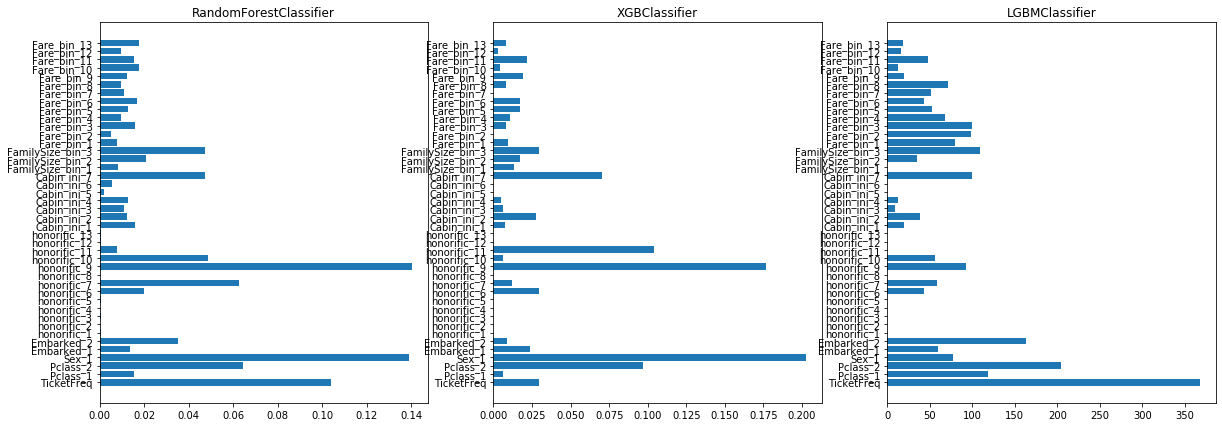

In [298]:
model_dict = {'RandomForestClassifier': rfc, 'XGBClassifier': xgb, 'LGBMClassifier': lgb}
plt.figure(figsize=(20,7))
i = 1
for model_nm, model in model_dict.items():
    plt.subplot(1,3,i)
    plt.barh(X_train.columns, model.feature_importances_, label=model_nm)
    plt.title(model_nm)
    i += 1

<BarContainer object of 42 artists>

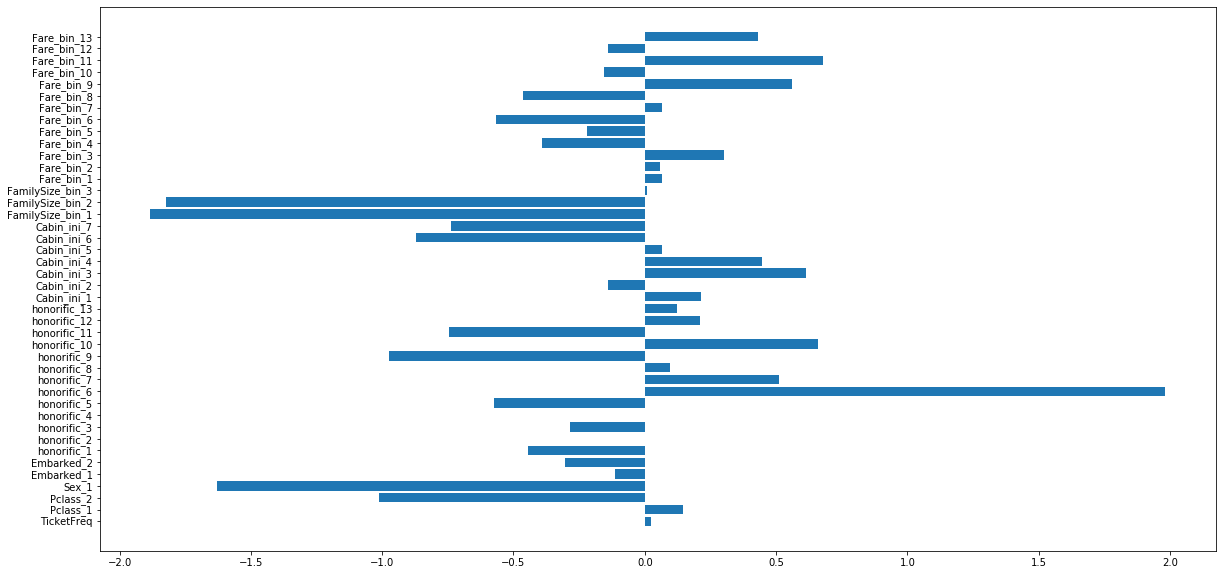

In [299]:
import numpy as np
plt.figure(figsize=(20,10))
plt.barh(np.array(X_train.columns),lr.coef_[0])

# 特徴量選択

In [300]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(random_state=0)
# lr.fit(X_train, y_train)
# print('LogisticRegression')
# print('='*20)
# print(f'accuracy of train set: {lr.score(X_train, y_train)}')
# print(f'accuracy of train set: {lr.score(X_test, y_test)}')

## パラメータチューニング

In [301]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [302]:
import optuna

In [303]:
cv = 5

In [314]:
def objective(trial):
    # "n_estimators":trial.suggest_int("n_estimators", 50, 200),
    #
    param_grid_rfc = {
        "max_depth": trial.suggest_int("max_depth", 5, 15),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        'min_samples_split': trial.suggest_int("min_samples_split", 7, 15),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
        'max_features': trial.suggest_int("max_features", 5, 15),
        "random_state": 0
    }

    model = RandomForestClassifier(**param_grid_rfc)
    
    # 5-Fold CV / Accuracy でモデルを評価する
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    scores = cross_validate(model, X=X_train, y=y_train, cv=kf)
    # 最小化なので 1.0 からスコアを引く
    return scores['test_score'].mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_params)
print(study.best_value)
rfc_best_param = study.best_params

[I 2020-01-21 09:01:33,128] Finished trial#0 resulted in value: 0.8427065891854625. Current best value is 0.8427065891854625 with parameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 10}.
[I 2020-01-21 09:01:34,091] Finished trial#1 resulted in value: 0.8314586821629074. Current best value is 0.8427065891854625 with parameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 10}.
[I 2020-01-21 09:01:35,074] Finished trial#2 resulted in value: 0.8384713877671623. Current best value is 0.8427065891854625 with parameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features': 10}.
[I 2020-01-21 09:01:35,970] Finished trial#3 resulted in value: 0.8356741849699596. Current best value is 0.8427065891854625 with parameters: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'criterion': 'entropy', 'max_features

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 11, 'criterion': 'gini', 'max_features': 9}
0.8441150398896878


In [315]:
def objective(trial):
    
    param_grid_xgb = {
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 5),
        'gamma': trial.suggest_discrete_uniform("gamma", 0.1, 1.0, 0.1),
        'subsample': trial.suggest_discrete_uniform("subsample", 0.5, 1.0, 0.1),
        'colsample_bytree': trial.suggest_discrete_uniform("colsample_bytree", 0.5, 1.0, 0.1),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        "random_state": 0
    }

    model = XGBClassifier(**param_grid_xgb)
    
    # 5-Fold CV / Accuracy でモデルを評価する
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    scores = cross_validate(model, X=X_train, y=y_train, cv=kf)
    # 最小化なので 1.0 からスコアを引く
    return scores['test_score'].mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_params)
print(study.best_value)
xgb_best_param = study.best_params

[I 2020-01-21 09:03:45,196] Finished trial#0 resulted in value: 0.8118487146656161. Current best value is 0.8118487146656161 with parameters: {'min_child_weight': 3, 'gamma': 0.1, 'subsample': 0.7, 'colsample_bytree': 0.6, 'max_depth': 7}.
[I 2020-01-21 09:03:45,898] Finished trial#1 resulted in value: 0.8259036737909977. Current best value is 0.8259036737909977 with parameters: {'min_child_weight': 2, 'gamma': 0.8, 'subsample': 0.6, 'colsample_bytree': 1.0, 'max_depth': 4}.
[I 2020-01-21 09:03:46,548] Finished trial#2 resulted in value: 0.818881118881119. Current best value is 0.8259036737909977 with parameters: {'min_child_weight': 2, 'gamma': 0.8, 'subsample': 0.6, 'colsample_bytree': 1.0, 'max_depth': 4}.
[I 2020-01-21 09:03:47,504] Finished trial#3 resulted in value: 0.8258741258741258. Current best value is 0.8259036737909977 with parameters: {'min_child_weight': 2, 'gamma': 0.8, 'subsample': 0.6, 'colsample_bytree': 1.0, 'max_depth': 4}.
[I 2020-01-21 09:03:48,051] Finished tria

{'min_child_weight': 2, 'gamma': 0.6, 'subsample': 0.8, 'colsample_bytree': 0.7, 'max_depth': 3}
0.8426967398798386


In [316]:
def objective(trial):
    
    param_grid_lgb = {
        'num_leaves': trial.suggest_int("num_leaves", 3, 10),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1.0),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        "random_state": 0
    }

    model = LGBMClassifier(**param_grid_lgb)
    
    # 5-Fold CV / Accuracy でモデルを評価する
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    scores = cross_validate(model, X=X_train, y=y_train, cv=kf)
    # 最小化なので 1.0 からスコアを引く
    return scores['test_score'].mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print(study.best_params)
print(study.best_value)
lgb_best_param = study.best_params

[I 2020-01-21 09:04:54,582] Finished trial#0 resulted in value: 0.6165763813651137. Current best value is 0.6165763813651137 with parameters: {'num_leaves': 5, 'learning_rate': 9.155844627535921e-08, 'max_depth': 10}.
[I 2020-01-21 09:04:54,983] Finished trial#1 resulted in value: 0.6165763813651137. Current best value is 0.6165763813651137 with parameters: {'num_leaves': 5, 'learning_rate': 9.155844627535921e-08, 'max_depth': 10}.
[I 2020-01-21 09:04:55,396] Finished trial#2 resulted in value: 0.6165763813651137. Current best value is 0.6165763813651137 with parameters: {'num_leaves': 5, 'learning_rate': 9.155844627535921e-08, 'max_depth': 10}.
[I 2020-01-21 09:04:55,813] Finished trial#3 resulted in value: 0.6165763813651137. Current best value is 0.6165763813651137 with parameters: {'num_leaves': 5, 'learning_rate': 9.155844627535921e-08, 'max_depth': 10}.
[I 2020-01-21 09:04:56,218] Finished trial#4 resulted in value: 0.6165763813651137. Current best value is 0.6165763813651137 wit

{'num_leaves': 9, 'learning_rate': 0.09292027281198578, 'max_depth': 4}
0.8398995370826355


In [317]:
import warnings
warnings.filterwarnings('ignore')

def objective(trial):
    
    param_grid_lr = {
        'C' : trial.suggest_int("C", 1, 100),
        "random_state": 0
    }

    model = LogisticRegression(**param_grid_lr)
    
    # 5-Fold CV / Accuracy でモデルを評価する
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    scores = cross_validate(model, X=X_train, y=y_train, cv=kf)
    # 最小化なので 1.0 からスコアを引く
    return scores['test_score'].mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)
print(study.best_params)
print(study.best_value)
lr_best_param = study.best_params

[I 2020-01-21 09:05:40,194] Finished trial#0 resulted in value: 0.8258642765685019. Current best value is 0.8258642765685019 with parameters: {'C': 18}.
[I 2020-01-21 09:05:40,649] Finished trial#1 resulted in value: 0.821638924455826. Current best value is 0.8258642765685019 with parameters: {'C': 18}.
[I 2020-01-21 09:05:41,054] Finished trial#2 resulted in value: 0.8230473751600513. Current best value is 0.8258642765685019 with parameters: {'C': 18}.
[I 2020-01-21 09:05:41,471] Finished trial#3 resulted in value: 0.8244459765586527. Current best value is 0.8258642765685019 with parameters: {'C': 18}.
[I 2020-01-21 09:05:41,892] Finished trial#4 resulted in value: 0.8244459765586527. Current best value is 0.8258642765685019 with parameters: {'C': 18}.
[I 2020-01-21 09:05:42,348] Finished trial#5 resulted in value: 0.8230375258544272. Current best value is 0.8258642765685019 with parameters: {'C': 18}.
[I 2020-01-21 09:05:42,781] Finished trial#6 resulted in value: 0.8230473751600513.

{'C': 11}
0.8300699300699301


In [318]:
import warnings
warnings.filterwarnings('ignore')

def objective(trial):
    
    param_grid_svc = {
        'C' : trial.suggest_int("C", 50, 200),
        'gamma': trial.suggest_loguniform("gamma", 1e-4, 1.0),
        "random_state": 0,
        'kernel': 'rbf'
    }

    model = SVC(**param_grid_svc)
    
    # 5-Fold CV / Accuracy でモデルを評価する
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    scores = cross_validate(model, X=X_train, y=y_train, cv=kf)
    # 最小化なので 1.0 からスコアを引く
    return scores['test_score'].mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)
print(study.best_params)
print(study.best_value)
svc_best_param = study.best_params

[I 2020-01-21 09:08:22,672] Finished trial#0 resulted in value: 0.8019994090416626. Current best value is 0.8019994090416626 with parameters: {'C': 82, 'gamma': 0.0001759129750564156}.
[I 2020-01-21 09:08:22,994] Finished trial#1 resulted in value: 0.8314882300797795. Current best value is 0.8314882300797795 with parameters: {'C': 135, 'gamma': 0.003274656775412651}.
[I 2020-01-21 09:08:23,326] Finished trial#2 resulted in value: 0.8230276765488032. Current best value is 0.8314882300797795 with parameters: {'C': 135, 'gamma': 0.003274656775412651}.
[I 2020-01-21 09:08:23,669] Finished trial#3 resulted in value: 0.8385107849896581. Current best value is 0.8385107849896581 with parameters: {'C': 122, 'gamma': 0.015173450268406122}.
[I 2020-01-21 09:08:23,960] Finished trial#4 resulted in value: 0.8371023342854329. Current best value is 0.8385107849896581 with parameters: {'C': 122, 'gamma': 0.015173450268406122}.
[I 2020-01-21 09:08:24,267] Finished trial#5 resulted in value: 0.816054368

{'C': 109, 'gamma': 0.010427472662353847}
0.8427459864079584


### 再学習

In [308]:
# 5-Fold CV / Accuracy でモデルを評価する
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [319]:
rfc_best = RandomForestClassifier(**rfc_best_param)
print('RandomForestClassifier')
print('='*20)
scores = cross_validate(rfc_best, X=train_feature, y=train_tagert, cv=kf)
print(f'mean:{scores["test_score"].mean()}, std:{scores["test_score"].std()}')
print('='*20)

xgb_best = XGBClassifier(**xgb_best_param)
print('XGBClassifier')
print('='*20)
scores = cross_validate(xgb_best, X=train_feature, y=train_tagert, cv=kf)
print(f'mean:{scores["test_score"].mean()}, std:{scores["test_score"].std()}')
print('='*20)

lgb_best = LGBMClassifier(**lgb_best_param)
print('LGBMClassifier')
print('='*20)
scores = cross_validate(lgb_best, X=train_feature, y=train_tagert, cv=kf)
print(f'mean:{scores["test_score"].mean()}, std:{scores["test_score"].std()}')
print('='*20)

lr_best = LogisticRegression(**lr_best_param)
print('LogisticRegression')
print('='*20)
scores = cross_validate(lr_best, X=train_feature, y=train_tagert, cv=kf)
print(f'mean:{scores["test_score"].mean()}, std:{scores["test_score"].std()}')
print('='*20)

svc_best = SVC(**svc_best_param)
print('SVC')
print('='*20)
scores = cross_validate(svc_best, X=train_feature, y=train_tagert, cv=kf)
print(f'mean:{scores["test_score"].mean()}, std:{scores["test_score"].std()}')
print('='*20)

RandomForestClassifier
mean:0.8226602222082733, std:0.013237172083535477
XGBClassifier
mean:0.8080660347749671, std:0.018736129308817257
LGBMClassifier
mean:0.8069424392693492, std:0.019474809298201185
LogisticRegression
mean:0.8114242671520934, std:0.023357436647299255
SVC
mean:0.8114117130123658, std:0.025494915616664178


In [320]:
from sklearn.ensemble import VotingClassifier

# voting に使う分類器を用意する
estimators = [
    ('rfc', RandomForestClassifier(**rfc_best_param)),
    ('xgb', XGBClassifier(**xgb_best_param)),
    ('lgb', LGBMClassifier(**lgb_best_param)),
    ('lr', LogisticRegression(**lr_best_param)),
    ('svc', SVC(**lr_best_param))
]
voting = VotingClassifier(estimators)

print('VotingClassifier')
print('='*20)
scores = cross_validate(voting, X=train_feature, y=train_tagert, cv=kf)
print(f'mean:{scores["test_score"].mean()}, std:{scores["test_score"].std()}')

VotingClassifier
mean:0.8125604167974391, std:0.020979385506195814


In [311]:
import numpy as np

def average_model(
    models:list,
    ge:int,
    train:pd.DataFrame,
    test:pd.Series=None
):
    
    sum_pred = 0
    for model in models:
        sum_pred += model.predict(train)
    sum_pred = np.where(sum_pred >= ge, 1, 0)
    if test is not None:
        print(f'accuracy{(sum_pred == np.array(test)).sum()/len(train)}')
    
    return sum_pred

# 推論

In [321]:
rfc_best = RandomForestClassifier(**rfc_best_param)
rfc_best.fit(train_feature, train_tagert)

xgb_best = XGBClassifier(**xgb_best_param)
xgb_best.fit(train_feature, train_tagert)

lgb_best = LGBMClassifier(**lgb_best_param)
lgb_best.fit(train_feature, train_tagert)

lr_best = LogisticRegression(**lr_best_param)
lr_best.fit(train_feature, train_tagert)

# svc_best = SVC(**svc_best_param)
# svc_best.fit(train_feature, train_tagert)

LogisticRegression(C=11, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [322]:
# pred = average_model([rfc_best,xgb_best,lgb_best], test_feature)
# pred = svc_best.predict(test_feature)
pred_rfc = rfc_best.predict(test_feature)
pred_xgb = xgb_best.predict(test_feature)
pred_lgb = lgb_best.predict(test_feature)
pred_lr = lr_best.predict(test_feature)
pred_average = average_model(
    [rfc_best,xgb_best,lgb_best,lr_best],
    3,
    test_feature
)
# pred = average_model([rfc,xgb,lgb], test_feature)
# pred = lr.predict(test_feature)

In [323]:
pd.concat(
    [
        pd.DataFrame(test.PassengerId, columns=['PassengerId']).reset_index(drop=True),
        pd.DataFrame(pred_rfc, columns=['Survived'])
    ],
    axis=1
).to_csv('output_rfc.csv', index=False)

pd.concat(
    [
        pd.DataFrame(test.PassengerId, columns=['PassengerId']).reset_index(drop=True),
        pd.DataFrame(pred_xgb, columns=['Survived'])
    ],
    axis=1
).to_csv('output_xgb.csv', index=False)

pd.concat(
    [
        pd.DataFrame(test.PassengerId, columns=['PassengerId']).reset_index(drop=True),
        pd.DataFrame(pred_lgb, columns=['Survived'])
    ],
    axis=1
).to_csv('output_lgb.csv', index=False)

pd.concat(
    [
        pd.DataFrame(test.PassengerId, columns=['PassengerId']).reset_index(drop=True),
        pd.DataFrame(pred_lr, columns=['Survived'])
    ],
    axis=1
).to_csv('output_lr.csv', index=False)

pd.concat(
    [
        pd.DataFrame(test.PassengerId, columns=['PassengerId']).reset_index(drop=True),
        pd.DataFrame(pred_average, columns=['Survived'])
    ],
    axis=1
).to_csv('output_average.csv', index=False)

In [324]:
output_lgb = pd.read_csv('output_lgb.csv')
output_lr = pd.read_csv('output_lr.csv')
output_xgb = pd.read_csv('output_xgb.csv')
output_rfc = pd.read_csv('output_rfc.csv')
output_average = pd.read_csv('output_average.csv')

In [325]:
(output_rfc==output_average).sum()

PassengerId    418
Survived       404
dtype: int64

In [53]:
test

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamilySize_bin_big,FamilySize_bin_mediam,FamilySize_bin_small,Cabin_ini_B,Cabin_ini_C,Cabin_ini_D,Cabin_ini_E,Cabin_ini_F,Cabin_ini_Rare,Cabin_ini_n
891,892,9,3,"Kelly, Mr. James",34.500000,0,0,330911,7.8292,NaN,...,0,0,0,0,0,0,0,0,0,1
892,893,9,3,"Wilkes, Mrs. James (Ellen Needs)",47.000000,1,0,363272,7.0000,NaN,...,0,0,1,0,0,0,0,0,0,1
893,894,9,2,"Myles, Mr. Thomas Francis",62.000000,0,0,240276,9.6875,NaN,...,0,0,0,0,0,0,0,0,0,1
894,895,9,3,"Wirz, Mr. Albert",27.000000,0,0,315154,8.6625,NaN,...,0,0,0,0,0,0,0,0,0,1
895,896,9,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.000000,1,1,3101298,12.2875,NaN,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,9,3,"Spector, Mr. Woolf",32.252151,0,0,A.5. 3236,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,1
1305,1306,9,1,"Oliva y Ocana, Dona. Fermina",39.000000,0,0,PC 17758,108.9000,C105,...,0,0,0,0,1,0,0,0,0,0
1306,1307,9,3,"Saether, Mr. Simon Sivertsen",38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,0,0,0,0,0,0,0,0,0,1
1307,1308,9,3,"Ware, Mr. Frederick",32.252151,0,0,359309,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_feature = train[feature_cols]
train_tagert = train[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    train_feature, train_tagert, test_size=0.2, random_state=0, stratify=train_tagert)